In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Question 1

In [2]:
dt = 0.01
dx =0.05

l = 10
t = 0.1
alpha = 40

r = alpha * dt/dx**2

N = int(t/dt)
J = int(l/dx)

matrix = np.zeros((N,J))

matrix[0:N,0]=100
matrix[0:N,-1]=50

matrix

array([[100.,   0.,   0., ...,   0.,   0.,  50.],
       [100.,   0.,   0., ...,   0.,   0.,  50.],
       [100.,   0.,   0., ...,   0.,   0.,  50.],
       ...,
       [100.,   0.,   0., ...,   0.,   0.,  50.],
       [100.,   0.,   0., ...,   0.,   0.,  50.],
       [100.,   0.,   0., ...,   0.,   0.,  50.]])

In [3]:
tf = np.zeros((J,J))

for i in range(1,J-1):
    tf[i,i] = 1+2*r
    tf[i,i-1]=tf[i,i+1] = -r

tf[0,0]=tf[J-1,J-1]=1

inverse = np.linalg.inv(tf)

inverse

array([[ 1.00000000e+00, -3.56944996e-17, -1.00981026e-16, ...,
        -2.30429938e-21, -9.06041002e-22, -2.05332108e-19],
       [ 9.24006319e-01,  5.77503950e-03,  5.33617299e-03, ...,
         2.93013372e-10,  1.46050279e-10,  2.33680446e-08],
       [ 8.53787678e-01,  5.33617299e-03,  1.07056971e-02, ...,
         5.87858077e-10,  2.93013372e-10,  4.68821395e-08],
       ...,
       [ 4.68821395e-08,  2.93013372e-10,  5.87858077e-10, ...,
         1.07056971e-02,  5.33617299e-03,  8.53787678e-01],
       [ 2.33680446e-08,  1.46050279e-10,  2.93013372e-10, ...,
         5.33617299e-03,  5.77503950e-03,  9.24006319e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [4]:
for i in range(0,N-1):
    matrix[i+1] = np.dot(inverse,matrix[i])

Text(0.5, 0, 'u(x,t)')

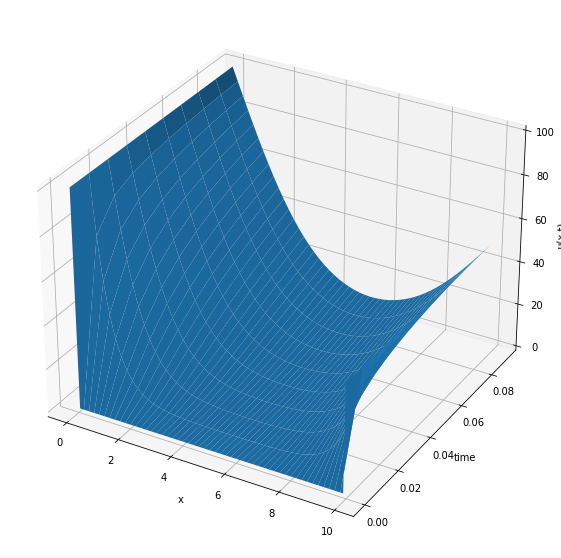

In [5]:
x = np.arange(0,l,dx)
time = np.arange(0,t,dt)

X,T = np.meshgrid(x,time)


fig =plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(X,T,matrix)
ax.set_xlabel('x')
ax.set_ylabel('time')
ax.set_zlabel('u(x,t)')

## Question 2

In [6]:
lenX=lenY=20
delta=1

Ttop=100
Tbottom =-100
Tleft=0
Tright=0

Tguess=30

In [7]:
colorinterpolation=50
colourMap = plt.cm.viridis

X,Y = np.meshgrid(np.arange(0,lenX),np.arange(0,lenY))

In [8]:
T = np.empty((lenX,lenY))
T.fill(Tguess)

T[(lenY-1):,:]=Ttop
T[:1,:]=Tbottom
T[:,(lenX-1):]=Tright
T[:,:1]=Tleft

In [9]:
T

array([[   0., -100., -100., -100., -100., -100., -100., -100., -100.,
        -100., -100., -100., -100., -100., -100., -100., -100., -100.,
        -100.,    0.],
       [   0.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,    0.],
       [   0.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,    0.],
       [   0.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,    0.],
       [   0.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,    0.],
       [   0.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,   30.,
          30.,    0.],
       [  

In [10]:
for it in range (0,500):
    for i in range(1,lenX-1,delta):
        for j in range(1,lenY-1,delta):
            T[i,j]=0.25*(T[i+1][j]+T[i-1][j]+T[i][j+1]+T[i][j-1])

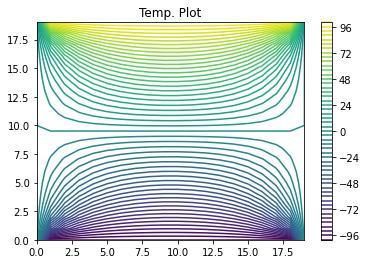

Text(0, 0.5, 'Y')

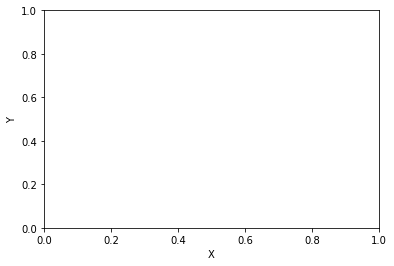

In [11]:
plt.title("Temp. Plot")

plt.contour(X,Y,T,colorinterpolation,cmap=colourMap)

plt.colorbar()

plt.show()

plt.xlabel('X')
plt.ylabel('Y')

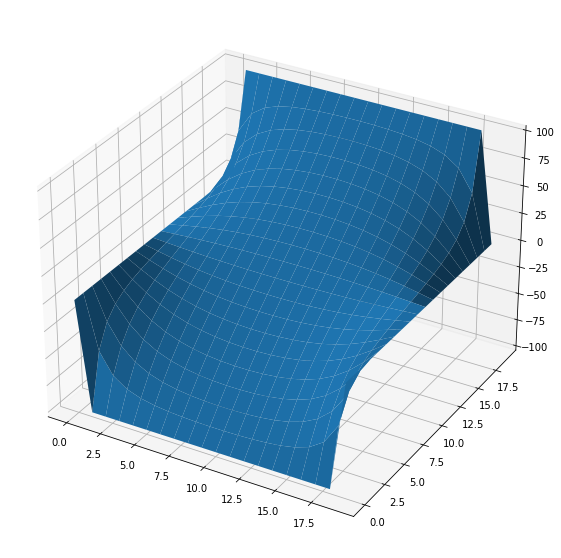

In [12]:
fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,T)